In [6]:
# Import libraries
import pandas as pd
import numpy as np
import datetime
import category_encoders as ce
import pickle

In [2]:
# Today's Date
today = datetime.date.today()

# Read historical data
df = pd.read_csv("Historical_Data.csv")
df['len'] = df['Questions'].str.len()

# Calculate date difference
df['Date'] = pd.to_datetime(df['Date'])
df['date_diff'] = today - df['Date']

In [3]:
# Convert date delta to number of days
df['date_diff'] = (df['date_diff'] / datetime.timedelta(minutes=1))/1440

In [4]:
# Create a list of features
feature_cols = ['Questions','len','date_diff']

# Create dataset for features and target variable
X = df[feature_cols] # Features
y = df.Error # Target variable

In [10]:
# Get one hot encoding of columns B
# one_hot = pd.get_dummies(X['Questions'])
# # Drop column B as it is now encoded
# X = X.drop('Questions',axis = 1)
# # Join the encoded df
# X = X.join(one_hot)
# X

# Categorical Encoding
encoder = ce.BinaryEncoder(cols = 'Questions')
encoderQuestions = encoder.fit(X)
X = encoderQuestions.transform(X)
pickle.dump(encoder, open('encoderQuestions', 'wb'))

In [11]:
X

,Questions_0,Questions_1,Questions_2,Questions_3,Questions_4,len,date_diff
0,0,0,0,0,1,81,5.0
1,0,0,0,1,0,46,5.0
2,0,0,0,1,1,87,5.0
3,0,0,1,0,0,77,5.0
4,0,0,1,0,1,63,5.0
5,0,0,1,1,0,44,5.0
6,0,0,1,1,1,30,5.0
7,0,1,0,0,0,18,5.0
8,0,1,0,0,1,42,5.0
9,0,1,0,1,0,43,5.0


In [12]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

C:\Apps\Continuum\anaconda3\envs\django_env\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [14]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0],
       [ 1,  0]], dtype=int64)

In [15]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,257.44,'Predicted label')

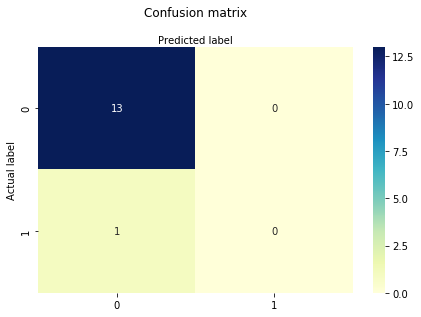

In [16]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.928571428571


In [18]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]

In [19]:
y_pred_proba

array([ 0.15198984,  0.00682137,  0.08342359,  0.04106733,  0.0085845 ,
        0.02606822,  0.12854503,  0.11611746,  0.01656154,  0.01782557,
        0.05715705,  0.17273392,  0.31147906,  0.00765271])

In [20]:
# Change output if want to change threshold

THRESHOLD = 0.32
preds = np.where(y_pred_proba > THRESHOLD, 'Yes', 'No')

In [21]:
# Confusion matrix for the output
cnf_matrix = metrics.confusion_matrix(y_test, preds)
cnf_matrix

array([[13,  0],
       [ 1,  0]], dtype=int64)

In [22]:
# Save Model
pickle.dump(logreg, open('logreg', 'wb'))